In [3]:
import gym
from ray.rllib.agents.ppo import PPOTrainer


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pogema 1.0.1 requires gym>=0.18.3, but you have gym 0.12.5 which is incompatible.
  Using cached gym-0.18.3-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.12.5
    Uninstalling gym-0.12.5:
      Successfully uninstalled gym-0.12.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rl-coach 1.0.0 requires gym==0.12.5, but you have gym 0.18.3 which is incompatible.


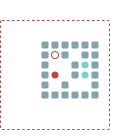

In [2]:
import gym
from pogema.wrappers.multi_time_limit import MultiTimeLimit
from pogema.animation import AnimationMonitor
from IPython.display import SVG, display
import numpy as np
import pogema
from pogema import GridConfig

# Define random configuration
grid_config = GridConfig(num_agents=3, # количество агентов на карте
                         size=4,      # размеры карты
                         density=0.4,  # плотность препятствий
                         seed=1,       # сид генерации задания 
                         max_episode_steps=256,  # максимальная длина эпизода
                         obs_radius=5, # радиус обзора
                        )

env = gym.make("Pogema-v0", grid_config=grid_config)
env = AnimationMonitor(env)

# обновляем окружение
obs = env.reset()

done = [False, ...]

while not all(done):
    # Используем случайную стратегию
    obs, reward, done, info = env.step([np.random.randint(4) for _ in range(len(obs))])
# сохраняем анимацию и рисуем ее
env.save_animation("render.svg", egocentric_idx=1)
display(SVG('render.svg'))

In [ ]:
trainer = PPOTrainer(
    config={
        # Env class to use (here: our gym.Env sub-class from above).
        "env": ParrotEnv,
        # Config dict to be passed to our custom env's constructor.
        "env_config": {
            "parrot_shriek_range": gym.spaces.Box(-5.0, 5.0, (1, ))
        },
        # Parallelize environment rollouts.
        "num_workers": 3,
    })



# Train for n iterations and report results (mean episode rewards).
# Since we have to guess 10 times and the optimal reward is 0.0
# (exact match between observation and action value),
# we can expect to reach an optimal episode reward of 0.0.
for i in range(5):
    results = trainer.train()
    print(f"Iter: {i}; avg. reward={results['episode_reward_mean']}")